In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mnist.nn_neural_network import NeuralNetwork
from mnist.nn_data_utils import DataUtils
from mnist.nn_metrics import Metrics
from mnist.nn_encoders import Encoders
from mnist.nn_activations import Activations

In [98]:
df = pd.read_csv('train.csv')

In [99]:
neural_model = NeuralNetwork(df)
dataset = DataUtils(df)

In [100]:
X_train, X_test, y_train, y_test = dataset.train_test_split(df)

In [101]:
w1,b1,w2,b2 = neural_model.gradient_descent(X_train, y_train, 0.1, 1000) 

Epoch:  1
Epoch:  11
Epoch:  21
Epoch:  31
Epoch:  41
Epoch:  51
Epoch:  61
Epoch:  71
Epoch:  81
Epoch:  91
Epoch:  101
Epoch:  111
Epoch:  121
Epoch:  131
Epoch:  141
Epoch:  151
Epoch:  161
Epoch:  171
Epoch:  181
Epoch:  191
Epoch:  201
Epoch:  211
Epoch:  221
Epoch:  231
Epoch:  241
Epoch:  251
Epoch:  261
Epoch:  271
Epoch:  281
Epoch:  291
Epoch:  301
Epoch:  311
Epoch:  321
Epoch:  331
Epoch:  341
Epoch:  351
Epoch:  361
Epoch:  371
Epoch:  381
Epoch:  391
Epoch:  401
Epoch:  411
Epoch:  421
Epoch:  431
Epoch:  441
Epoch:  451
Epoch:  461
Epoch:  471
Epoch:  481
Epoch:  491
Epoch:  501
Epoch:  511
Epoch:  521
Epoch:  531
Epoch:  541
Epoch:  551
Epoch:  561
Epoch:  571
Epoch:  581
Epoch:  591
Epoch:  601
Epoch:  611
Epoch:  621
Epoch:  631
Epoch:  641
Epoch:  651
Epoch:  661
Epoch:  671
Epoch:  681
Epoch:  691
Epoch:  701
Epoch:  711
Epoch:  721
Epoch:  731
Epoch:  741
Epoch:  751
Epoch:  761
Epoch:  771
Epoch:  781
Epoch:  791
Epoch:  801
Epoch:  811
Epoch:  821
Epoch:  831
Epo

In [102]:
weights = (w1, b1, w2, b2)

In [103]:
print(w1)
print("_______________")
print(weights[1])

[[-0.01078094  0.10984104  0.46721471 ... -0.39062608  0.0771347
   0.05589879]
 [-0.41360856  0.09383482  0.35172817 ...  0.05378236 -0.26333288
   0.04234499]
 [ 0.03322306 -0.03528523  0.38053691 ... -0.2403338  -0.30549976
  -0.17337911]
 ...
 [-0.45505195  0.37876762 -0.18597412 ...  0.27442791  0.2121344
  -0.16472064]
 [-0.10683049 -0.41212987 -0.43931252 ...  0.25888105 -0.48063589
   0.42870989]
 [ 0.4277207  -0.25197512 -0.37049704 ...  0.39331329  0.11982151
  -0.3783386 ]]
_______________
[[0.46524968]
 [0.96991052]
 [0.34962547]
 [0.24728749]
 [1.05727066]
 [0.3342897 ]
 [0.82872853]
 [0.68856958]
 [0.49002429]
 [0.241342  ]]


In [104]:
print(weights[0])

[[-0.01078094  0.10984104  0.46721471 ... -0.39062608  0.0771347
   0.05589879]
 [-0.41360856  0.09383482  0.35172817 ...  0.05378236 -0.26333288
   0.04234499]
 [ 0.03322306 -0.03528523  0.38053691 ... -0.2403338  -0.30549976
  -0.17337911]
 ...
 [-0.45505195  0.37876762 -0.18597412 ...  0.27442791  0.2121344
  -0.16472064]
 [-0.10683049 -0.41212987 -0.43931252 ...  0.25888105 -0.48063589
   0.42870989]
 [ 0.4277207  -0.25197512 -0.37049704 ...  0.39331329  0.11982151
  -0.3783386 ]]


In [105]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = neural_model.forward(W1, b1, W2, b2, X)

    predictions = neural_model.get_predictions(A2)
    return predictions

In [106]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]

    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


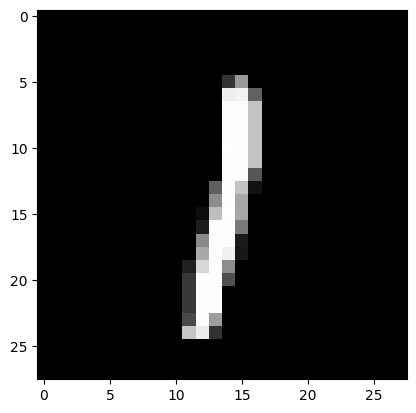

In [107]:
test_prediction(1, weights[0],weights[1], weights[2], weights[3])

In [108]:
import pickle

In [109]:
filename = "finalised_model_03.sav"
pickle.dump(weights, open(filename, "wb"))

In [110]:
with open('/home/kmaev/dev/ML_Rebelway_course/ml_course_homework/finalised_model_02.sav', 'rb') as file:
    i_weights = pickle.load(file)

Prediction:  [5]
Label:  5


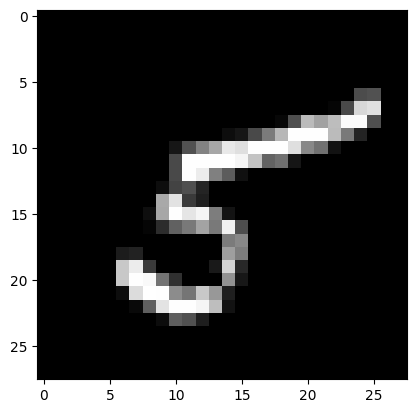

In [111]:
test_prediction(0, i_weights[0],i_weights[1], i_weights[2], i_weights[3])

In [112]:
hou_array = np.load('file_test.npy')



In [113]:
def test_hou_prediction(hou_array, W1, b1, W2, b2):
    current_image = hou_array

    prediction = make_predictions(hou_array, W1, b1, W2, b2)
    
    print("Prediction: ", prediction)
    

In [114]:
test_hou_prediction(hou_array, i_weights[0],i_weights[1], i_weights[2], i_weights[3])



Prediction:  [9]
